Prediction on tax fraud

Intro：The study was conducted to build a classification model that can predict the classification of a company being fraudulent based on current and past risk factors, collecting data bases from 2015-2016 to build predictive tools for classifying suspicious companies.And this research can be applied to many industries such as industry and agriculture. In addition, the study is authentic and multi-faceted: the combination of data in the dataset takes into account multiple aspects such as audit reports, environmental status reports, persistent problem reports, etc.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Dataset of companies with no risk.

In [2]:
audit_risk <- read_csv("data/audit_risk.csv")
audit_risk

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5,⋯,0.4,0,0.2,0,2,1.456,0.4,0.5,0.2912,0
55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5,⋯,0.4,0,0.2,0,2,1.440,0.4,0.5,0.2880,0
55.57,15,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5,⋯,0.4,0,0.2,0,2,1.464,0.4,0.5,0.2928,0


In [3]:
risk_data <- audit_risk |>
                select(LOCATION_ID,Sector_score,Money_Value,History,District_Loss,contains("Risk")) 

risk_data_scaled <- risk_data |>  
                            mutate(Inherent_Risk = scale(Inherent_Risk, center = TRUE), 
                            Money_Value = scale(Money_Value, center = TRUE)) |>
                            filter(Inherent_Risk <= 2)
                            
risk_data_split <- initial_split(risk_data_scaled, prop = 0.75, strata = Risk)  
risk_data_train <- training(risk_data_split)   
risk_data_test <- testing(risk_data_split)
risk_data_train
risk_data_test

LOCATION_ID,Sector_score,Money_Value,History,District_Loss,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<chr>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>
6,3.89,-0.212256,0,2,0.102,0.046,1,0.00,0.4,0,-0.2947121,0.4,0.5,0.3096,0
6,3.89,-0.212256,0,2,0.000,0.016,1,0.00,0.4,0,-0.2971235,0.4,0.5,0.2832,0
6,3.89,-0.167966,0,2,0.000,0.166,1,0.59,0.4,0,-0.2836051,0.4,0.5,0.4312,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2,55.57,-0.19874377,0,6,0.424,0.126,1,0.180,1.2,0,-0.2694656,1.2,0.5,1.7580,1
32,55.57,-0.20580014,0,2,0.000,5.094,1,0.086,0.4,0,-0.2027870,0.4,0.5,1.3160,1
13,55.57,0.02931198,0,2,0.424,0.640,1,9.654,0.4,0,-0.1016183,0.4,0.5,2.4236,1


LOCATION_ID,Sector_score,Money_Value,History,District_Loss,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<chr>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>
6,3.89,-0.19814323,0,2,0.00,0.966,1.0,0.188,0.4,0,-0.276334397,0.4,0.5,0.5108,0
6,3.89,-0.03584681,0,2,0.00,6.480,3.6,7.050,0.4,0,-0.002751399,0.4,0.5,3.5060,1
7,3.89,0.46260290,0,2,0.44,2.964,1.0,26.970,0.4,0,0.257459353,0.4,0.5,6.3548,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,55.57,-0.212256,0,2,0.088,0.106,1,0,0.4,0,-0.2938718,0.4,0.5,0.3188,0
14,55.57,-0.212256,0,2,0.048,0.008,1,0,0.4,0,-0.2963928,0.4,0.5,0.2912,0
18,55.57,-0.212256,0,2,0.040,0.000,1,0,0.4,0,-0.2966851,0.4,0.5,0.2880,0


Warning message:
“Removed 1 rows containing missing values (geom_point).”


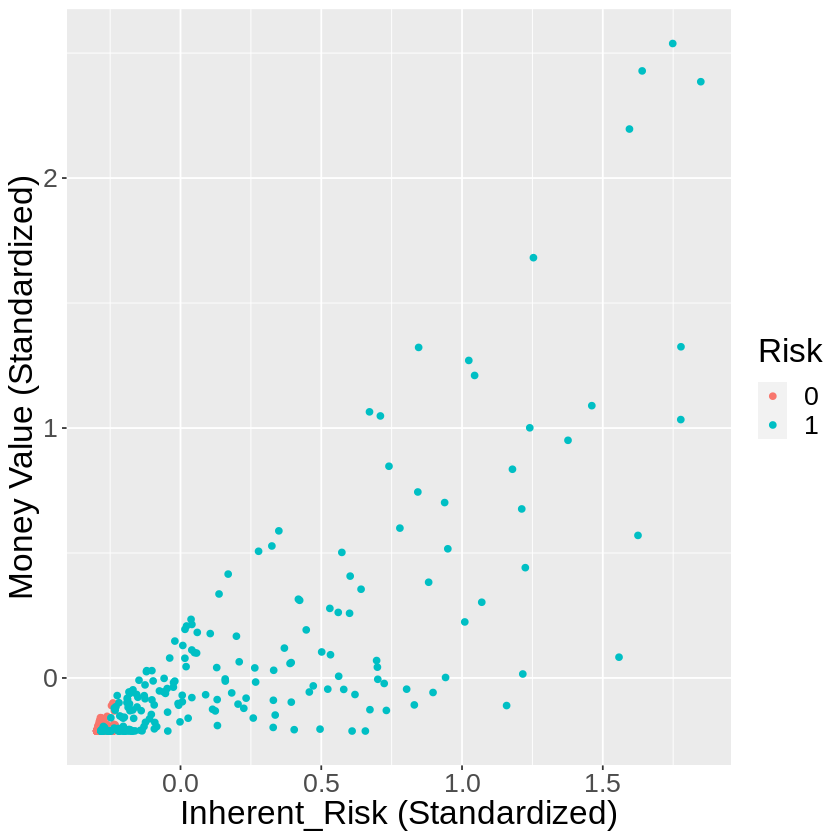

In [4]:
risk_plot <- risk_data_train |>
                ggplot(aes(x = Inherent_Risk, y = Money_Value, color = as_factor(Risk))) +
                geom_point() +
                labs(x = "Inherent_Risk (Standardized)", y = "Money Value (Standardized)", color = "Risk") +
                theme(text = element_text(size = 20))
risk_plot